In [66]:
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data Processing
import numpy as np
import pandas as pd
import pickle
from gensim.models import Word2Vec

# NLP 
import re
import gensim
import nltk
import spacy
from nltk.corpus import stopwords
nltk.download('wordnet')

# ML
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

# BERT
import torch
from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM
from scipy.spatial.distance import cosine

import warnings

[nltk_data] Downloading package wordnet to /Users/kaushik-
[nltk_data]     shakkari/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [35]:
df = pd.read_csv('/Users/kaushik-shakkari/Downloads/counsel_chat_dataset.csv')

In [36]:
df.shape

(2271, 11)

In [37]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
df.head(10)

,questionID,questionTitle,questionText,questionLink,topic,therapistInfo,therapistURL,answerText,upvotes,views,split
0,0,Can I change my feeling of being worthless to everyone?,"I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.\n How can I change my feeling of being worthless to everyone?",https://counselchat.com/questions/can-i-change-my-feeling-of-being-worthless-to-everyone,depression,"Sherry Katz, LCSWCouples and Family Therapist, LCSW",https://counselchat.com/therapists/sherry-katz-lcsw,"If everyone thinks you're worthless, then maybe you need to find new people to hang out with.Seriously, the social context in which a person lives is a big influence in self-esteem.Otherwise, you can go round and round trying to understand why you're not worthless, then go back to the same crowd and be knocked down again.There are many inspirational messages you can find in social media. Maybe read some of the ones which state that no person is worthless, and that everyone has a good purpose to their life.Also, since our culture is so saturated with the belief that if someone doesn't feel good about themselves that this is somehow terrible.Bad feelings are part of living. They are the motivation to remove ourselves from situations and relationships which do us more harm than good.Bad feelings do feel terrible. Your feeling of worthlessness may be good in the sense of motivating you to find out that you are much better than your feelings today.",1,2899,train
1,0,Can I change my feeling of being worthless to everyone?,"I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.\n How can I change my feeling of being worthless to everyone?",https://counselchat.com/questions/can-i-change-my-feeling-of-being-worthless-to-everyone,depression,"Robin Landwehr, DBH, LPCC, NCCMental Health in a Primary Care Setting",https://counselchat.com/therapists/robin-landwehr-dbh-lpcc-ncc,"Hello, and thank you for your question and seeking advice on this. Feelings of worthlessness is unfortunately common. In fact, most people, if not all, have felt this to some degree at some point in their life. You are not alone. Changing our feelings is like changing our thoughts - it's hard to do. Our minds are so amazing that the minute you change your thought another one can be right there to take it's place. Without your permission, another thought can just pop in there. The new thought may feel worse than the last one! My guess is that you have tried several things to improve this on your own even before reaching out on here. People often try thinking positive thoughts, debating with their thoughts, or simply telling themselves that they need to ""snap out of it"" - which is also a thought that carries some self-criticism. Some people try a different approach, and there are counselors out there that can help you with this. The idea is that instead of trying to change the thoughts, you change how you respond to them. You learn skills that allow you to manage difficult thoughts and feelings differently so they don't have the same impact on you that they do right now. For some people, they actually DO begin to experience less hurtful thoughts once they learn how to manage the ones they have differently. Acceptance and Commitment Therapy may be a good choice for you. There is information online and even self-help books that you can use to teach you the skills that I mentioned. Because they are skills, they require practice, but many people have found great relief and an enriched life by learning them. As for suicidal thoughts, I am very glad to read that this h

In [38]:
df = df.drop_duplicates(subset='questionText', keep="first")

In [39]:
df.shape

(827, 11)

In [40]:
df.questionTitle.nunique()

820

In [41]:
df.questionText.nunique()

826

In [42]:
df.answerText.nunique()

820

In [43]:
df.topic.nunique()

30

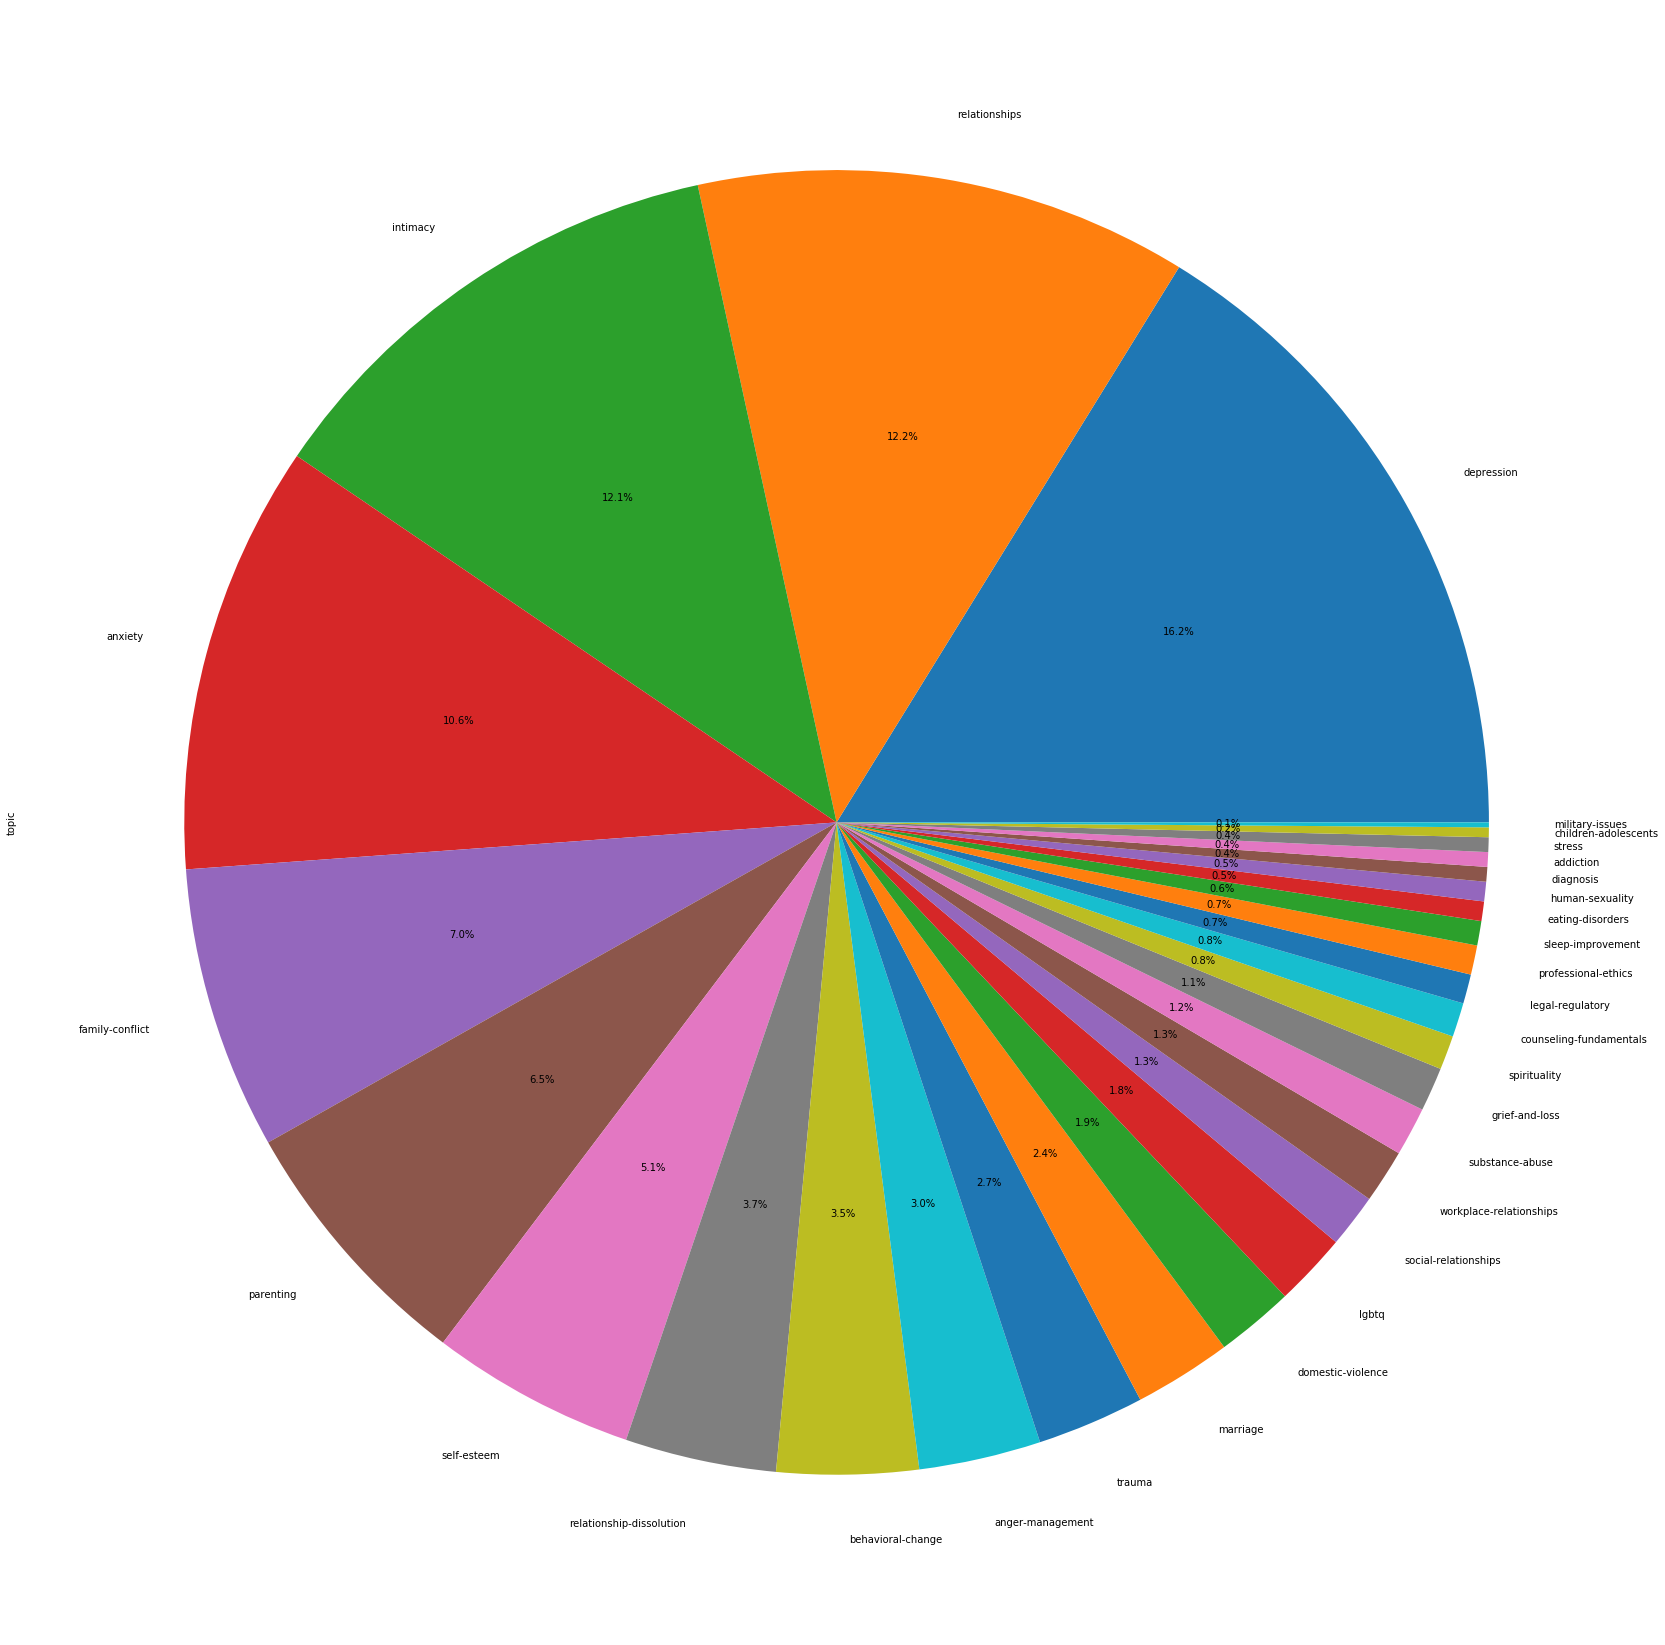

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(30,30))
df['topic'].value_counts().plot.pie( autopct = '%1.1f%%')

In [45]:
df.topic.value_counts()

depression                  134
relationships               101
intimacy                    100
anxiety                     88 
family-conflict             58 
parenting                   54 
self-esteem                 42 
relationship-dissolution    31 
behavioral-change           29 
anger-management            25 
trauma                      22 
marriage                    20 
domestic-violence           16 
lgbtq                       15 
social-relationships        11 
workplace-relationships     11 
substance-abuse             10 
grief-and-loss              9  
spirituality                7  
counseling-fundamentals     7  
legal-regulatory            6  
professional-ethics         6  
sleep-improvement           5  
eating-disorders            4  
human-sexuality             4  
diagnosis                   3  
addiction                   3  
stress                      3  
children-adolescents        2  
military-issues             1  
Name: topic, dtype: int64

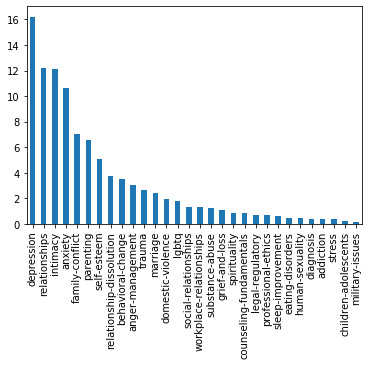

In [46]:
df.topic.value_counts(normalize=True).apply(lambda x:x*100).plot(kind='bar')
#df.topic.value_counts(normalize=True).apply(lambda x:x*100).plot(kind='')

#plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')

In [47]:
df.topic.value_counts(normalize=True).apply(lambda x:str(round(x*100,3))+" %")

depression                  16.203 %
relationships               12.213 %
intimacy                    12.092 %
anxiety                     10.641 %
family-conflict             7.013 % 
parenting                   6.53 %  
self-esteem                 5.079 % 
relationship-dissolution    3.748 % 
behavioral-change           3.507 % 
anger-management            3.023 % 
trauma                      2.66 %  
marriage                    2.418 % 
domestic-violence           1.935 % 
lgbtq                       1.814 % 
social-relationships        1.33 %  
workplace-relationships     1.33 %  
substance-abuse             1.209 % 
grief-and-loss              1.088 % 
spirituality                0.846 % 
counseling-fundamentals     0.846 % 
legal-regulatory            0.726 % 
professional-ethics         0.726 % 
sleep-improvement           0.605 % 
eating-disorders            0.484 % 
human-sexuality             0.484 % 
diagnosis                   0.363 % 
addiction                   0.363 % 
s

In [48]:
#df = df[df.topic.isin(["depression","relationships","intimacy","anxiety"])]

In [49]:
df.shape

(827, 11)

In [50]:
df["topic"] = df["topic"].astype('category')

In [51]:
df["labels"] = df["topic"].cat.codes

In [52]:
df["text"] = df["questionText"]

In [53]:
df.head()

,questionID,questionTitle,questionText,questionLink,topic,therapistInfo,therapistURL,answerText,upvotes,views,split,labels,text
0,0,Can I change my feeling of being worthless to everyone?,"I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.\n How can I change my feeling of being worthless to everyone?",https://counselchat.com/questions/can-i-change-my-feeling-of-being-worthless-to-everyone,depression,"Sherry Katz, LCSWCouples and Family Therapist, LCSW",https://counselchat.com/therapists/sherry-katz-lcsw,"If everyone thinks you're worthless, then maybe you need to find new people to hang out with.Seriously, the social context in which a person lives is a big influence in self-esteem.Otherwise, you can go round and round trying to understand why you're not worthless, then go back to the same crowd and be knocked down again.There are many inspirational messages you can find in social media. Maybe read some of the ones which state that no person is worthless, and that everyone has a good purpose to their life.Also, since our culture is so saturated with the belief that if someone doesn't feel good about themselves that this is somehow terrible.Bad feelings are part of living. They are the motivation to remove ourselves from situations and relationships which do us more harm than good.Bad feelings do feel terrible. Your feeling of worthlessness may be good in the sense of motivating you to find out that you are much better than your feelings today.",1,2899,train,6,"I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.\n How can I change my feeling of being worthless to everyone?"
23,1,Do I have too many issues for counseling?,"I have so many issues to address. I have a history of sexual abuse, I’m a breast cancer survivor and I am a lifetime insomniac. I have a long history of depression and I’m beginning to have anxiety. I have low self esteem but I’ve been happily married for almost 35 years.\n I’ve never had counseling about any of this. Do I have too many issues to address in counseling?",https://counselchat.com/questions/do-i-have-too-many-issues-for-counseling,depression,"Noorayne ChevalierMA, RP, CCC, CCAC, LLP (Michigan)",https://counselchat.com/therapists/noorayne-chevalier,"Let me start by saying there are never too many concerns that you can bring into counselling. In fact, most people who come to see me for counselling have more than one issue they would like to work on in psychotherapy and most times these are all interconnected. In counselling, we work together, collaboratively, to figure out which issues you would like to address first and then together we develop an individualized plan of care. Basically, it’s like a road map of where you want to go, how are you going to get there, looking at stopovers, some scenic routes others possibly not so scenic, however, necessary. Of course, these plans can also change due to internal (what we have control over like our thoughts, feelings and behaviours) or external reasons (those things that are outside our control). I would encourage you to take the next step and reach out to a professional you can trust and build rapport with by co-journeying through whatever concerns you have by examining what has been working so far as you have learned to cope with some of your issues like insomnia, depression and anxiety, as well as being a breast cancer survivor. Then to help you by developing new coping strategies. Psychotherapy can be such a powerful tool to help you get to where it is you want to be. I know you can do it and you will see first-hand how psychotherap

In [54]:
df.topic.value_counts()

depression                  134
relationships               101
intimacy                    100
anxiety                     88 
family-conflict             58 
parenting                   54 
self-esteem                 42 
relationship-dissolution    31 
behavioral-change           29 
anger-management            25 
trauma                      22 
marriage                    20 
domestic-violence           16 
lgbtq                       15 
social-relationships        11 
workplace-relationships     11 
substance-abuse             10 
grief-and-loss              9  
spirituality                7  
counseling-fundamentals     7  
legal-regulatory            6  
professional-ethics         6  
sleep-improvement           5  
eating-disorders            4  
human-sexuality             4  
diagnosis                   3  
stress                      3  
addiction                   3  
children-adolescents        2  
military-issues             1  
Name: topic, dtype: int64

In [55]:
df.dtypes

questionID       int64   
questionTitle    object  
questionText     object  
questionLink     object  
topic            category
therapistInfo    object  
therapistURL     object  
answerText       object  
upvotes          int64   
views            int64   
split            object  
labels           int8    
text             object  
dtype: object

In [56]:
df.text = df.text.astype("str")

In [57]:
model = ClassificationModel('roberta', 'roberta-base', num_labels=30, use_cuda=False)

In [58]:
train_df, eval_df = train_test_split(df, test_size=0.3, random_state =333)

In [59]:
train_df = train_df[['text', 'labels']]
eval_df = eval_df[['text', 'labels']]

In [60]:
train_df = train_df.reset_index()
train_df.drop(['index'], axis = 1, inplace = True)

In [61]:
eval_df = eval_df.reset_index()
eval_df.drop(['index'], axis = 1, inplace = True)

In [62]:
def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')

In [63]:
model.train_model(train_df, args={'learning_rate':1e-4, 'num_train_epochs': 10, 'reprocess_input_data': True, 'overwrite_output_dir': True,"train_batch_size": 14}, f1=f1_multiclass, acc=accuracy_score)

Converting to features started. Cache is not used.


Running loss: 2.902194

Running loss: 1.962406

/Users/kaushik-shakkari/anaconda3/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 1.588725

Running loss: 2.708254

Running loss: 1.436731

Running loss: 0.880301

Running loss: 0.393843

Running loss: 0.075371

Running loss: 0.123791

Running loss: 0.074598

Running loss: 0.034472
Training of roberta model complete. Saved to outputs/.


In [64]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df, f1=f1_multiclass, acc=accuracy_score)

Converting to features started. Cache is not used.



{'mcc': 0.39872391867685136, 'f1': 0.4497991967871486, 'acc': 0.4497991967871486, 'eval_loss': 2.2844927246915177}


In [65]:
result

{'mcc': 0.39872391867685136,
 'f1': 0.4497991967871486,
 'acc': 0.4497991967871486,
 'eval_loss': 2.2844927246915177}

In [33]:
result['f1']

0.6456692913385826